# "Small Ball"

# By Junhao Lin, Jingru Wang, Xiao Yang

# CMSC320 Final Tutorial

# Overview

1. Introduction

        1.1 Background infomation
        1.2 Concept
        1.3 Libraries
        
2. Data Collection

        2.1 Data scraping
        2.2 Load data
        
3. Analysis

        3.1 Height of players Overview
        3.2 Height changed over time
        3.3 Height, points, wins
        3.4 Analysis in different time periods
        
4. Test on relationship

        4.1 test on height vs. winning rate
        4.2 test on height vs. points
        
5. Conclusion


# 1. Introduction

    On January 31, 2020, at the Rockets’ home game Toyota Center, James Harden led the Rockets to a 128-121 victory over the Dallas Mavericks. The special thing about this game is the Rockets became the first NBA team to play an entire game without a player listed taller than 6-foot-6 since the New York Knicks in a Jan. 31, 1963, loss to the Chicago Zephyrs. Before the game, the Rockets' starting center, 2.08 meters tall Clint Capela, was injured. This leaves the Rockets with only substitutes Tyson Chandler and Isaiah Hartenstein at the center position.

    Is using a small lineup a last resort for the Rockets? Or does the NBA not need big guys anymore? 

    This tutorial is to show our understanding of data analysis and applying it in the real world. Specifically, we aim to test and verify a "rumor" that "Small Ball' becomes more and more popular in the NBA." Is it true? We are going to verify this claim base on the change of the average height of each team over years. 

    We would like to thank Basketball-reference(https://www.basketball-reference.com/), which covers player statistics from 1950 to 2020. As loyal fans of basketball (especially basketball fans about the NBA), we have always wanted to investigate the statistics of the league to show trends and even answer specific questions.

## 1.1 Background information

    The NBA (National Basketball Association) was established in 1949 after the merger of the two leagues; the American Basketball Association (BAA) and the National Basketball League (NBL). Now the NBA almost represents the highest level of basketball in the world.

    More than a decade ago, outside stars rarely chose to misplace their opponent's big players and more often singled out outside players who were against them. For example, Kobe has a series of so-called "Kobe Stoppers"-Raja Bell, Ruben Patterson, and Sean Battier. In the 2001 finals, there was Tyronn Lue who stuck Allen Iverson. There is no scene in which Iverson takes the ball and singles out O'Neal near the three-point line or Kobe plays Duncan in the high post. 

    However, in recent years, a group of new-style guards represented by Curry and Harden has increasingly used the "dislocation of small and large" tactics. Their success rate is also quite high, which is caused deliberately through pick and roll. This kind of dislocation comes to fight.

    In the 2018 playoffs, Curry played Gobert of the Jazz several times, and Harden also frequently broke through Kanter of the Thunder in high positions. Most teams seem to have no good way to do this. Either let the inside line scalp up hard or lower the height and let the wing-height players play inside to speed up. In the finals of last season, there was even a scene where there was no center on the field against both sides. The big reason was that because you got a big man, you would be targeted by the opposing guard. 

## 1.2 Concept

    "Small Ball" is a concept in the backetball game. It is the style of having more "smaller" players in the team. These players tend to have higher speed, agility, and higher scoring compare to other "big" players who are higher and stronger physically. Players like Isaiah Thomas, Stephen Curry, Kyrie Irving, and Klay Thompson are familiar to the audiences today. And they are representative of "Small Ball." 

## 1.3 Libraries



    Load the Python libraries we will use for this tutorial.

    · Python 3.5
    · Pandas
    · Requests
    · BeautifulSoup
    · re
    · os
    · matplotlib
    · seaborn
    · statsmodels
    · pickle

#### Import Libraries

In [73]:
import pandas as pd
import requests
import string
import re
import os
from bs4 import BeautifulSoup as bs
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
# sns.set(rc={'figure.figsize':(24,10)})
try:
    os.mkdir("./final_2")
except:
    os.chdir("./final_2")

# 2. Data Collection

As the world's No. 1 basketball league, the NBA began to record player statistics for each game as early as the early 1970s. The statistics at the time were still handwritten on paper by the staff of each team. Nowadays, NBA technical statistics can be easily downloaded from the Internet. But the data from different websites are not the same, which will bring inconsistency to data analysis. The data we selected are all from the website basketball-reference. We believe that the data on this website is the most reliable because all come from the official NBA database and are used widely in the NBA data analysis field.

## 2.1 Data Scraping

##  Team Stats： Change Year over Year

Because our analysis will be based on the height of the players of each team in the NBA, we need to get the statistics of each team in each season, including various technical statistics, the number of wins and losses, and the average height of players. To get these data more efficiently, we code a small web-crawler program. It can download the statistics of each team for each season under the teams directory on the basketball-reference website.

In [77]:
teams_url = 'https://www.basketball-reference.com/teams/'
teams_page = requests.get(teams_url)
soup = bs(teams_page .content, 'html.parser')
team_links = soup.select('#teams_active a')
tm_url = [str(lk).split("/")[2] for  lk in team_links]
pattern_stats_per_game = 'https://www.basketball-reference.com/teams/TEAM_KURZ/stats_per_game_yr_yr.html'
for i in range(len(tm_url)):
     tm = tm_url[i]
     print(tm)
     tmp_team = pattern_stats_per_game.replace("TEAM_KURZ", tm)
     tmp_dfs = pd.read_html(tmp_team)[0]
     with open(tm + ".pkl", 'wb') as f:
         pickle.dump(tmp_dfs, f)

ATL
BOS
NJN
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOH
NYK
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


##  Team Stats： Stats by Year

In [79]:
 num_pattern_url = 'https://www.basketball-reference.com/teams/TEAM_KURZ/stats_per_game_totals.html'
 for i in range(len(tm_url)):
     tm = tm_url[i]
     print(tm)
     tmp_team = num_pattern_url.replace("TEAM_KURZ", tm)
     tmp_dfs = pd.read_html(tmp_team)[0]
     with open(tm + "num_per_game.pkl", 'wb') as f:
         pickle.dump(tmp_dfs, f)

ATL
BOS
NJN
CHA
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOH
NYK
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


## 2.2 Load data

After getting the basic data, let us load the data. When loading data, remove the extra columns and select only the data for the 1970 and later seasons. We believe that NBA games before 1970 were also very exciting and representative. However, because the statistics of that era were independently recorded by each team and were handwritten on paper, the data set lacked reliability and consistency. Therefore, we have decided to only use data from 1970 and beyond.

In [80]:
team_change = None
for i in range(len(tm_url)):
    tm = tm_url[i]
    with open(tm + ".pkl", 'rb') as f:
        ts = pickle.load(f)
        ts = ts[[i for i in ts.columns if i.find("Unname") < 0]]
        ts['Year'] = ts['Season'].apply(lambda x: x.split("-")[0])
        ts = ts.loc[ts.Year >= '1970']
        ts.loc[ts.Year != 'Season']
    team_change = pd.concat([team_change, ts], axis = 0)
team_change = team_change.loc[team_change.Lg == 'NBA']
obj_cols = ['Season', 'Lg', 'Tm']
for i in team_change.columns:
    if i not in obj_cols:
        tmp = team_change[i]
        team_change[i] = [float(str(i).replace("%", '')) for i in tmp.values]
team_change['Year'] = pd.to_datetime(team_change.Year, format='%Y')
team_change

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,2019-20,NBA,ATL,-4.0,-0.8,0.5,67.0,0.4,-1.8,-1.3,...,-15.3,-3.1,-6.2,-7.3,-5.2,-0.4,-4.9,-1.9,-1.4,2019-01-01
1,2018-19,NBA,ATL,-1.2,0.3,1.4,82.0,0.8,8.4,7.3,...,28.5,4.9,10.0,8.8,5.8,20.4,9.5,20.3,9.7,2018-01-01
2,2017-18,NBA,ATL,-9.0,0.3,-3.2,82.0,-0.9,0.2,1.4,...,-11.8,-3.6,-5.5,0.4,-5.1,-12.3,-1.4,7.7,0.2,2017-01-01
3,2016-17,NBA,ATL,-1.1,0.3,0.9,82.0,0.3,-1.4,-0.1,...,24.0,0.8,5.3,-7.7,-10.0,-18.3,5.5,-5.0,0.3,2016-01-01
4,2015-16,NBA,ATL,1.4,0.0,-0.5,82.0,0.5,1.5,3.3,...,-5.0,6.2,3.8,-0.5,0.4,27.9,5.1,7.8,0.3,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1974-75,NBA,WSB,0.8,0.1,2.0,82.0,0.4,2.2,-2.4,...,-11.9,-4.3,-6.6,13.3,32.1,-7.3,1.7,12.3,2.8,1974-01-01
48,1973-74,NBA,CAP,0.4,-0.3,-1.9,82.0,0.0,-4.8,0.0,...,NaN,NaN,-0.8,-13.7,NaN,NaN,NaN,4.4,-2.9,1973-01-01
49,1972-73,NBA,BAL,-1.5,-0.3,1.5,82.0,-0.3,4.8,1.7,...,NaN,NaN,1.1,12.9,NaN,NaN,NaN,-10.0,-2.0,1972-01-01
50,1971-72,NBA,BAL,-2.9,0.1,-1.9,82.0,-0.1,-5.3,-7.0,...,NaN,NaN,-8.6,2.5,NaN,NaN,NaN,-5.5,-5.1,1971-01-01


In [81]:
team_num = None
def ft2m(x):
    x = x.split('-')
    return int(x[0]) * 0.3048 + int(x[1]) * 0.0254
for i in range(len(tm_url)):
    tm = tm_url[i]
    with open(tm + "num_per_game.pkl", 'rb') as f:
        ts = pickle.load(f)
        ts = ts[[i for i in ts.columns if i.find("Unname") < 0]]
        ts['Year'] = ts['Season'].apply(lambda x: x.split("-")[0])
        ts = ts.loc[ts.Year >= '1970']
        ts.loc[ts.Year != 'Season']
    team_num = pd.concat([team_num, ts], axis = 0)
team_num = team_num.loc[team_num.Lg == 'NBA']
obj_cols = ['Season', 'Lg', 'Tm', 'Ht.']
for i in team_num.columns:
    if i not in obj_cols:
        tmp = team_num[i]           
        team_num[i] = [float(str(i).replace("%", '')) for i in tmp.values]
team_num['Year'] = pd.to_datetime(team_num.Year, format='%Y')
team_num['Ht.'] = team_num['Ht.'].apply(lambda x: ft2m(x))
team_num

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,2019-20,NBA,ATL,20.0,47.0,5.0,24.1,1.9812,216.0,67.0,...,9.9,33.4,43.3,24.0,7.8,5.1,16.2,23.1,111.8,2019-01-01
1,2018-19,NBA,ATL,29.0,53.0,5.0,25.1,2.0066,215.0,82.0,...,11.6,34.5,46.1,25.8,8.2,5.1,17.0,23.6,113.3,2018-01-01
2,2017-18,NBA,ATL,24.0,58.0,5.0,25.4,1.9812,212.0,82.0,...,9.1,32.8,41.9,23.7,7.8,4.2,15.6,19.6,103.4,2017-01-01
3,2016-17,NBA,ATL,43.0,39.0,2.0,27.9,1.9812,219.0,82.0,...,10.3,34.1,44.3,23.6,8.2,4.8,15.8,18.2,103.2,2016-01-01
4,2015-16,NBA,ATL,48.0,34.0,2.0,28.2,1.9812,217.0,82.0,...,8.3,33.8,42.1,25.6,9.1,5.9,15.0,19.1,102.8,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1974-75,NBA,WSB,60.0,22.0,1.0,26.6,1.9558,207.0,82.0,...,13.8,33.7,47.5,24.5,11.3,5.0,19.4,23.9,104.7,1974-01-01
48,1973-74,NBA,CAP,47.0,35.0,1.0,26.4,1.9558,203.0,82.0,...,15.7,35.2,50.9,21.6,8.6,5.4,19.1,21.3,101.9,1973-01-01
49,1972-73,NBA,BAL,52.0,30.0,1.0,26.3,1.9558,207.0,82.0,...,NaN,NaN,51.3,25.0,NaN,NaN,NaN,20.4,105.0,1972-01-01
50,1971-72,NBA,BAL,38.0,44.0,1.0,26.7,1.9558,204.0,82.0,...,NaN,NaN,50.7,22.1,NaN,NaN,NaN,22.7,107.1,1971-01-01


# 3. Analysis

The NBA is full of talented players. Just analyzing the data of a few players is not a good proof of any trend changes in the entire NBA. We will first take the team as a unit of our analysis. Now let's take a look at how tall these sports giants are, and what the height of most of them is. Maybe their height is not too different from you and me.

In [82]:
team_num.head()

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,2019-20,NBA,ATL,20.0,47.0,5.0,24.1,1.9812,216.0,67.0,...,9.9,33.4,43.3,24.0,7.8,5.1,16.2,23.1,111.8,2019-01-01
1,2018-19,NBA,ATL,29.0,53.0,5.0,25.1,2.0066,215.0,82.0,...,11.6,34.5,46.1,25.8,8.2,5.1,17.0,23.6,113.3,2018-01-01
2,2017-18,NBA,ATL,24.0,58.0,5.0,25.4,1.9812,212.0,82.0,...,9.1,32.8,41.9,23.7,7.8,4.2,15.6,19.6,103.4,2017-01-01
3,2016-17,NBA,ATL,43.0,39.0,2.0,27.9,1.9812,219.0,82.0,...,10.3,34.1,44.3,23.6,8.2,4.8,15.8,18.2,103.2,2016-01-01
4,2015-16,NBA,ATL,48.0,34.0,2.0,28.2,1.9812,217.0,82.0,...,8.3,33.8,42.1,25.6,9.1,5.9,15.0,19.1,102.8,2015-01-01


## 3.1 Height of Players Overview

We use some average heights as the horizontal axis, and the vertical axis is the percentage of the number of players.

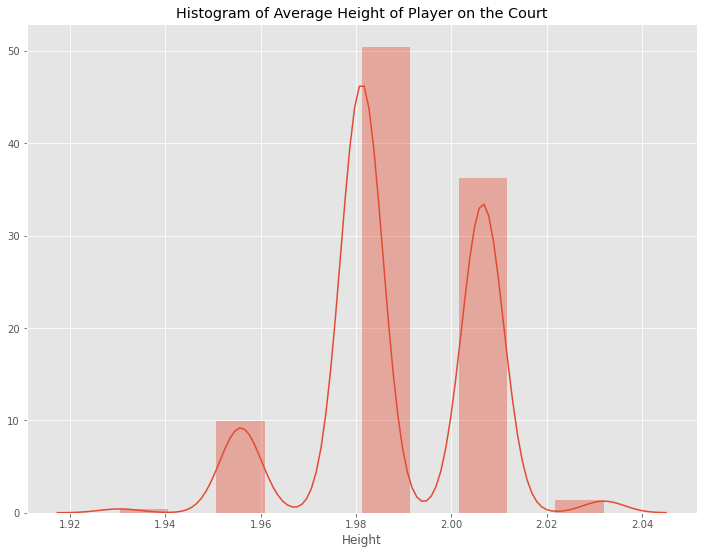

In [83]:
plt.figure(figsize=(12,9)) #
# sns.set() # for style
sns.distplot(team_num['Ht.'],  bins=10)
plt.title("Histogram of Average Height of Player on the Court") # for histogram title
plt.xlabel('Height')
plt.show()

Ignoring Time, the average height in most games is between 1.95 and 2.01. From the histogram, there are three main pillars, around 1.95, around 1.98, and around 2.00. This distribution is not surprising. Most point guards and shooting guards are between 1.90 and 2 meters tall. They need great luck and the ability to move. Excessive height is disadvantageous. Center forward players and power forward and small forward players are relatively taller.

Has there been a significant change in the average height of NBA teams in the 50 seasons since 1970? Let us use the following line chart to see how the average height changes over time. The horizontal axis of the graph represents the year, and the vertical axis represents the average height.

## 3.2 Height Change Over Time

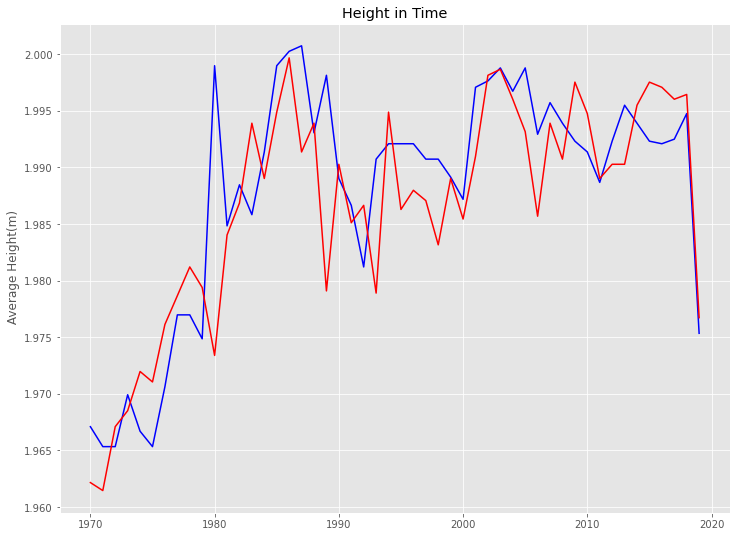

In [84]:
team_num['W_pct'] = team_num.W /(team_num.L + team_num.W)   * 100
plt.figure(figsize=(12, 9))
plt.plot(team_num.loc[team_num['W_pct'] > 50].groupby('Year')[['Ht.']].mean(), color = 'blue')
plt.plot(team_num.loc[team_num['W_pct'] <= 50].groupby('Year')[['Ht.']].mean(), color = 'red')
plt.title('Height in Time')
plt.ylabel(' Average Height(m)')
plt.show()

Over time, around 1985 the height reached the peak, and now the low point comes.

We can see that around 1985 there is the highest peak of average player height in NBA history. You may think that this is because the 1980s was a time when big men competed, but the facts are a little different. The height peak in 1985 is the result of the popularity of centers in the 1970s and even the 1960s. At that time, there was no penalty zone restriction, so all teams were looking for big players to strengthen their internal confrontation. After reaching the height peak, the average height quickly slipped. If you pay attention to the NBA of that era, it is not difficult to know that it belonged to the right era of the Lakers and the Celtics. Larry Bird and Magic Johnson changed NBA strategy for the first time. The NBA has changed its focus on defense from earlier to dazzling passing and smooth offense. Although the height of the two is still around 2.06, they have strong athletic talents. They are very flexible. The NBA began to lean towards offensive and defensive balance and rapid rotation of player positions around 1985, but confrontation in the penalty area is still very important.

Since 2000, the height of players has increased again. The peak height at this stage appeared around 2003. In 2001, to limit O’Neal’s ability to rule in the penalty area, the league introduced the three-second rule. In 2003, O'Neal still led the Lakers to their three consecutive championships. At the same time, there are many great inside big players such as Kevin Garnett of the Timberwolves, Spurs vs. Duncan, and Nowitzki of the Mavericks. The little giant Yao Ming joined the Rockets in 2002. Howard was selected by the Magic in 2004.
    
Starting around 2014, the blue curve representing a winning percentage higher than 50% began to fall below the red curve representing a winning percentage equal to or lower than 50%. This shows that low height is gradually becoming an advantage for achieving high winning rates. This situation has happened twice in the past 15 years, the last time it happened between 2008-2010, and each can last about 3 seasons. However, this situation rarely happened before 2008, even if it happened for a short time.
    
The change in height is not big throughout the history of the NBA. However, the phenomenon of decreasing height and increasing the winning rate shows that the use of smaller players or more flexible players is increasing the winning rate of the team. The huge drop in player height in the 2019-2020 season shows that more teams have begun to implement small ball strategies.

<Figure size 864x648 with 0 Axes>

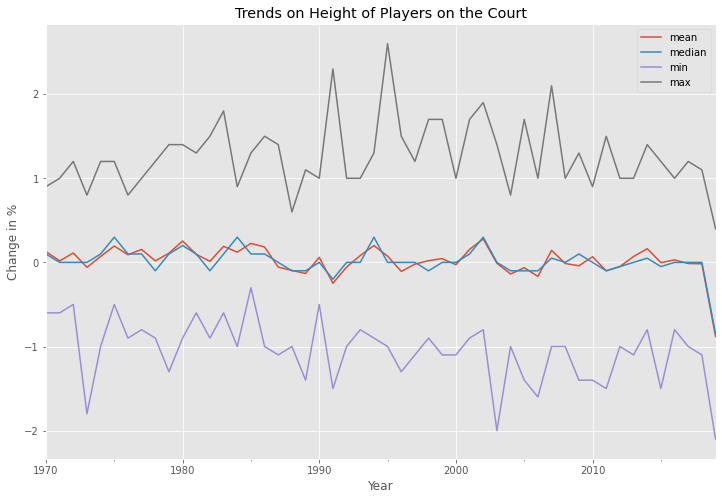

In [85]:
plt.figure(figsize =(12, 9))
change_ht = team_change.groupby('Year')[['Ht.']].agg(['mean', 'median', "min", "max"])#.
change_ht.columns =[i[1] for i in change_ht.columns]
change_ht.plot(figsize = (12, 8))
plt.ylabel('Change in %')
plt.title("Trends on Height of Players on the Court")
plt.show()

There is a significant decreasing trend in the average height of players on the court in recent years.

## 3.3 Height,  Points and Win

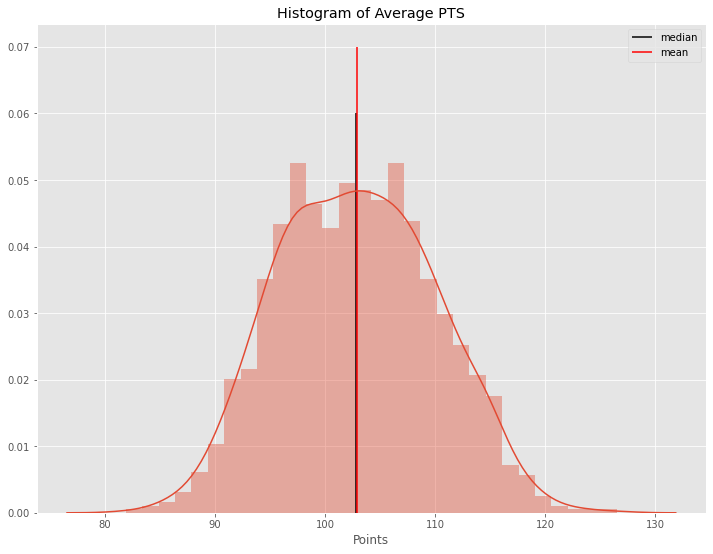

In [86]:
### Points
plt.figure(figsize =(12, 9))
sns.distplot(team_num['PTS'],  bins=30)
plt.vlines(team_num['PTS'].median(), ymin = 0 , ymax =  0.06, label = 'median')
plt.vlines(team_num['PTS'].mean(), ymin = 0 , ymax =  0.07,color = 'red', label = 'mean')
plt.title("Histogram of Average PTS") # for histogram title
plt.xlabel('Points')
plt.legend()
plt.show()

Points are asymmetrically distributed, with mean and median around 103. 

## 3.4 Analysis in different time periods

In [87]:
def get_period(x):
    a = 2
    if x < pd.to_datetime(1990, format="%Y"):
        a = 0
    elif x < pd.to_datetime(2010, format="%Y"):
        a = 1
    return a

team_num['period'] = team_num['Year'].apply(lambda x: get_period(x))

We classify the records in to time period:
- before 1990
- 1990 - 2010
- 2010 to now

The NBA before 1990 and the NBA today are very different in terms of rules, overall physical fitness of players, and technical and tactical theory. Therefore, we divide the NBA in this period into the same stage. From 1990 to 2010, it was an era that emphasized internal offense and defense. The team will build a team lineup with center players as the core. Although the situation has changed after 2005, a small number of teams began to implement small ball strategies, but they are still in the process of exploring and experimenting with skills and tactics. The period that embodies the advantage of small ball strategy is from 2010.

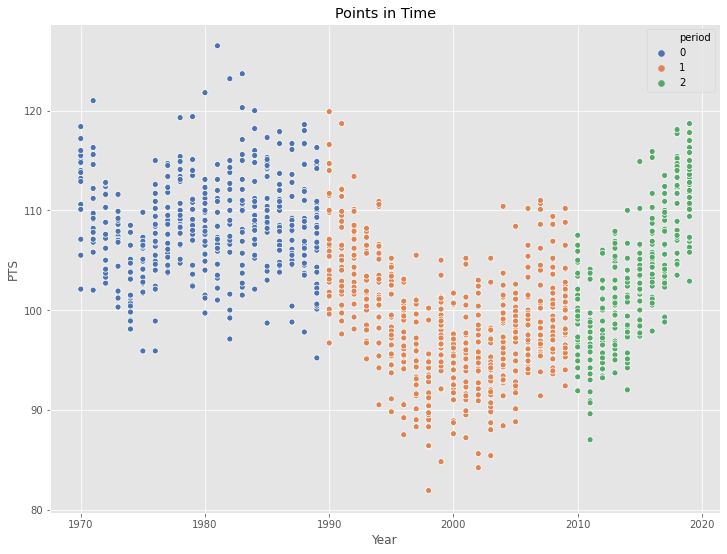

In [88]:
plt.figure(figsize =(12, 9))
sns.scatterplot(data=team_num, x='Year', y='PTS', hue = 'period', palette="deep")
plt.title('Points in Time')
plt.show()

In the term of point, there are two peak time, around 1985, and now, which is corresponding to a special time in the term of height, the peak of height around 1985 and the low height now.

Starting around 1990, the NBA's defensive intensity gradually increased, which led to a decline in all teams' points. In 2001, the league began to implement the three-second rule. This caused the team to score up. After 2010, the popularity of small players and three-pointers pushed up the score again.

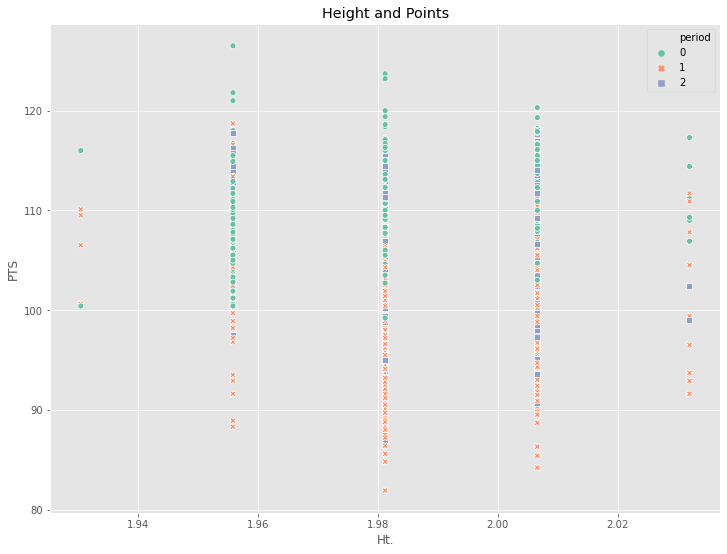

In [89]:
plt.figure(figsize =(12, 9))

#sns.scatterplot(data=team_num.loc[team_num['period'] == 2], x='Ht.', y='PTS', hue = 'period', palette="Set2", style='period')
sns.scatterplot(data=team_num, x='Ht.', y='PTS', hue = 'period', palette="Set2", style='period')
plt.title('Height and Points')
plt.show()

In [90]:
team_num.loc[team_num['PTS'] > 120] # high point team

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,W_pct,period
37,1983-84,NBA,DEN,38.0,44.0,3.0,27.0,1.9812,204.0,82.0,...,43.6,30.3,8.7,4.3,16.4,27.8,123.7,1983-01-01,46.341463,0
38,1982-83,NBA,DEN,45.0,37.0,2.0,27.2,1.9812,202.0,82.0,...,45.6,28.5,9.6,4.3,18.2,25.5,123.2,1982-01-01,54.878049,0
39,1981-82,NBA,DEN,46.0,36.0,2.0,27.0,1.9558,201.0,82.0,...,43.8,27.7,8.1,4.5,17.9,26.0,126.5,1981-01-01,56.097561,0
40,1980-81,NBA,DEN,37.0,45.0,4.0,26.8,1.9558,204.0,82.0,...,46.6,24.8,8.8,4.6,17.6,25.7,121.8,1980-01-01,45.121951,0
50,1971-72,NBA,LAL,69.0,13.0,1.0,29.5,1.9558,211.0,82.0,...,56.4,27.2,NaN,NaN,NaN,20.0,121.0,1971-01-01,84.146341,0
37,1983-84,NBA,SAS,37.0,45.0,5.0,27.4,2.0066,205.0,82.0,...,45.8,28.8,8.4,6.0,17.6,26.2,120.3,1983-01-01,45.121951,0


It is clear, as long as the height is not extremely low, small size team are likely getting high points. However, it is also clear, with higher Height, teams are likely not getting low points.

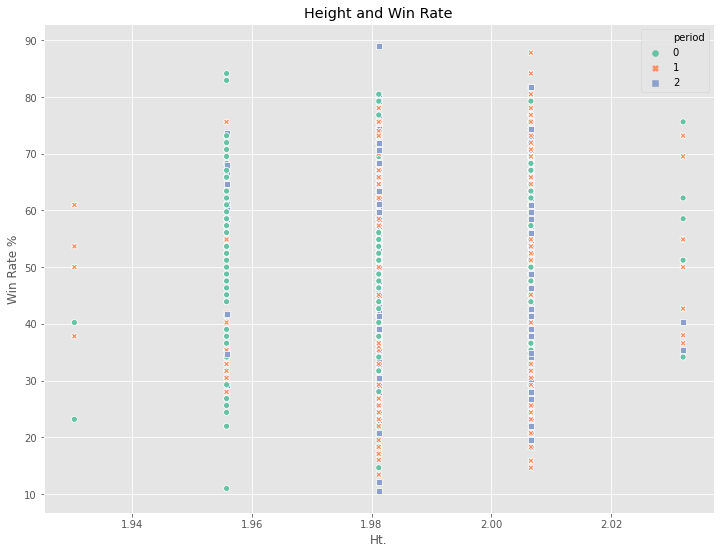

In [91]:
team_num['W_pct'] = team_num.W /(team_num.L + team_num.W)   * 100
plt.figure(figsize =(12, 9))
sns.scatterplot(data=team_num, x='Ht.', y='W_pct',hue = 'period', palette="Set2",style='period')
plt.title('Height and Win Rate')
plt.ylabel('Win Rate %')
plt.show()

In [92]:
team_num.loc[team_num['W_pct'] > 80] # high win rate team

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,W_pct,period
12,2007-08,NBA,BOS,66.0,16.0,1.0,27.9,1.9812,220.0,82.0,...,42.0,22.4,8.5,4.6,15.2,22.7,100.5,2007-01-01,80.487805,1
35,1985-86,NBA,BOS,67.0,15.0,1.0,29.3,2.0066,204.0,82.0,...,46.4,29.1,7.8,6.2,16.6,21.4,114.1,1985-01-01,81.707317,0
49,1972-73,NBA,BOS,68.0,14.0,1.0,28.0,1.9558,209.0,82.0,...,58.6,28.3,NaN,NaN,NaN,22.0,112.7,1972-01-01,82.926829,0
24,1996-97,NBA,CHI,69.0,13.0,1.0,30.7,2.0066,210.0,82.0,...,45.1,26.1,8.7,4.0,13.5,19.7,103.1,1996-01-01,84.146341,1
25,1995-96,NBA,CHI,72.0,10.0,1.0,29.9,2.0066,209.0,82.0,...,44.6,24.8,9.1,4.2,14.3,22.0,105.2,1995-01-01,87.804878,1
29,1991-92,NBA,CHI,67.0,15.0,1.0,27.6,2.0066,207.0,82.0,...,44.0,27.8,8.2,5.9,13.3,20.6,109.9,1991-01-01,81.707317,1
11,2008-09,NBA,CLE,66.0,16.0,1.0,26.6,2.0066,218.0,82.0,...,42.2,20.3,7.2,5.3,12.7,20.3,100.3,2008-01-01,80.487805,1
13,2006-07,NBA,DAL,67.0,15.0,1.0,28.1,2.0066,220.0,82.0,...,41.9,19.9,6.8,5.0,13.9,22.4,100.0,2006-01-01,81.707317,1
3,2016-17,NBA,GSW,67.0,15.0,1.0,28.2,2.0066,219.0,82.0,...,44.4,30.4,9.6,6.8,14.8,19.3,115.9,2016-01-01,81.707317,2
4,2015-16,NBA,GSW,73.0,9.0,1.0,27.4,1.9812,213.0,82.0,...,46.2,28.9,8.4,6.1,15.2,20.7,114.9,2015-01-01,89.024390,2


Regarding win rate, however, the small ball does not return a better win rate in general, but, considering the low absolute team number in the small ball pillar showed above, we may be interested in the question that if the probability of getting a high win rate with a small ball is relatively hight. 

In [93]:
cols_plot = ['MP', 'FG', 'FGA', 'FG%', '3P', 
            '3PA', '3P%', '2P', '2PA', '2P%',
            'FT', 'FTA', 'FT%', 'ORB', 'DRB',
            'TRB', 'AST', 'STL', 'BLK', 'TOV',
            'PF','PTS']

In [94]:
team_num.groupby('period')[cols_plot].mean().T

period,0,1,2
MP,241.400935,241.748090,241.767333
FG,43.076869,37.123264,38.486667
FGA,90.623364,81.502257,84.529667
FG%,0.475762,0.455352,0.455337
3P,1.131395,5.025000,8.782333
3PA,3.803488,14.230729,24.650333
3P%,0.272306,0.348427,0.355387
2P,42.394626,32.102604,29.706000
2PA,88.332944,67.270312,59.880000
2P%,0.480853,0.477285,0.497327


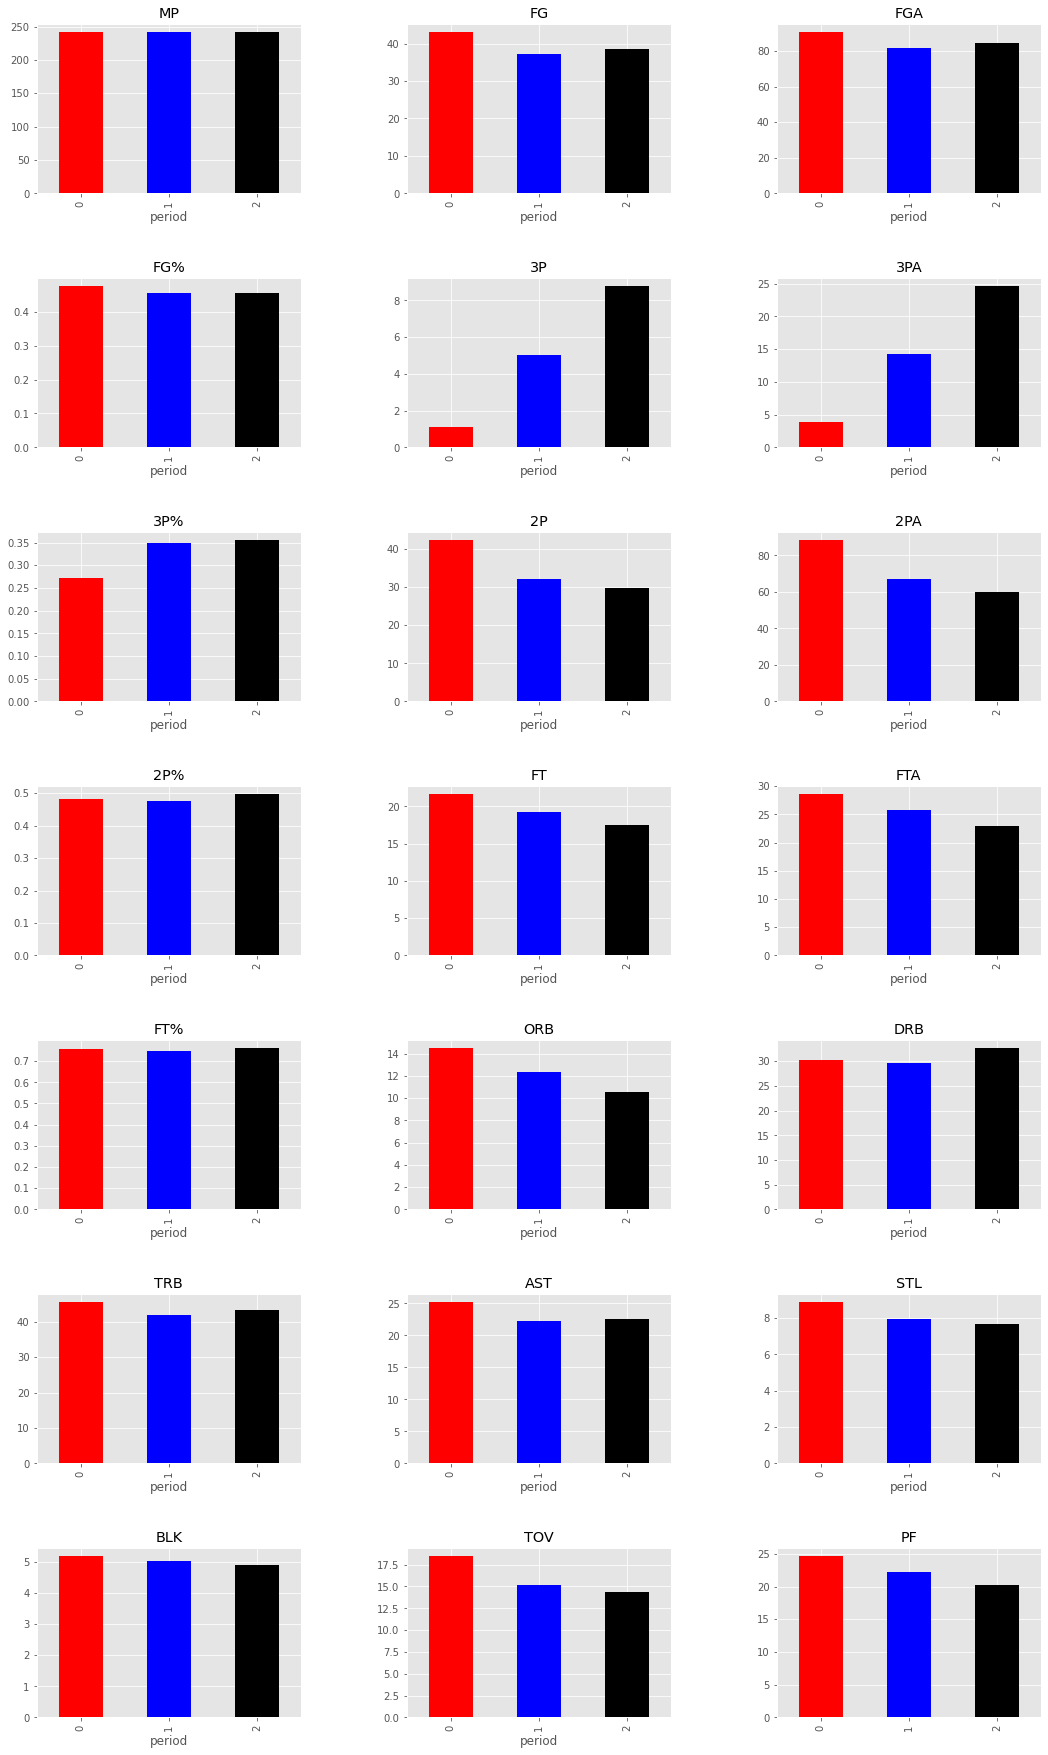

In [95]:
fig, ax = plt.subplots(ncols=3, nrows=int(len(cols_plot)/3), figsize = (18, 24))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
i =0 
for row in ax:
    for col in row:
        team_num.groupby('period')[cols_plot[i]].mean().plot(kind = 'bar',\
                                                             title = cols_plot[i], ax = col, color = ['red', 'blue',
                                                                                                     'black'])
        plt.xlabel('')
        i = i + 1
plt.show()

There are obvious features in todays' NBA:
- Quick ball:
    - Largely incrased 3 points throws, but just a bit less 2 point throw than yesterday
    
- Easy ball:
    - Less fouls and less free throws
    - Somehow more total rebound, but much more offensive rebound.

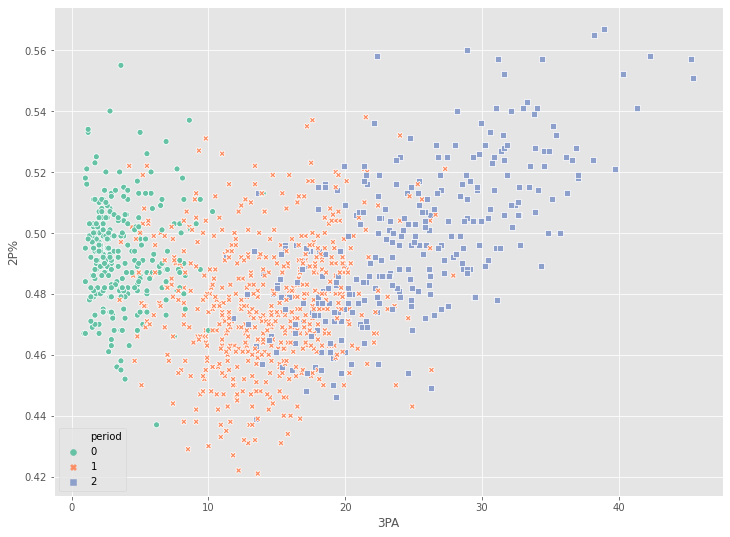

In [96]:
team_num['W_pct'] = team_num.W /(team_num.L + team_num.W)   * 100
plt.figure(figsize =(12, 9))
sns.scatterplot(data=team_num, x='3PA', y='2P%', hue = 'period', palette="Set2",style='period')

Let's look at the relationship between the number of three-pointers and two-pointers made. These two seemingly unrelated data are the key to the small ball strategy. We can see from the figure that the increase in the number of three-point shots is positively correlated with the two-point shot percentage. This phenomenon only appeared in the third stage of our division, period 2. What is the cause of this phenomenon?

The first is that changes in the NBA's three-second rule and zone defense rules have made it more difficult for big insiders such as centers to score. Star players also received more double-teams without the ball because of the cancellation of the zone defense rules. The best way to break the defense at this time is to increase the space between the defensive players. More three-point shots can be a good way to make defensive players come near the three-point line to create more two-pointer offensive space such as breakthrough layups. This makes the two-pointer goal rate higher and the offense is more efficient.

Next, We are going to test the relationship between height and win rate/points, with interaction term periods.

# 4. Test On Relationship

In [97]:
model_df = team_num[[ 'Ht.', 'W_pct', 'period', 'PTS']].copy()
model_df.columns = ['Ht', 'W_pct', 'period','PTS']

## 4.1 Test On Height vs. Winning Rate

In [98]:
res = smf.ols(formula='W_pct ~   Ht + C(period) +  Ht : C(period)', data= model_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W_pct   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.792
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0162
Time:                        09:59:55   Log-Likelihood:                -5389.2
No. Observations:                1304   AIC:                         1.079e+04
Df Residuals:                    1298   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -87.1440     76.839     -1.134      0.257    -237.885      63.597
C(period)[T.1]     -103.5573    109.890     -0.942      0.346    -319.138     112.023
C(period)[T.2]      274.8043    140.045      1.962      0.050       0.065     549.543
Ht                   69.1792     38.758      1.785      0.075      -6.855     145.214
Ht:C(period)[T.1]    51.7001     55.304      0.935      0.350     -56.795     160.195
Ht:C(period)[T.2]  -138.3244     70.413     -1.964      0.050    -276.460      -0.189
==============================================================================
Omnibus:                       56.886   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.202
Skew:                          -0.178   Prob(JB):                     4.56e-07
Kurtosis:                       2.359   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The result suggests:

- In general, Height has a positive impact on win rate, increasing 1 cm, the expected win rate 0.69%
- Today, which is attributed to period 2, given height, however, the win rate will be decreasing, increasing 1 cm, the win rate will decrease 1.38%, but in period 1, e.g 1990-2010, increasing 1 cm lead to 0.5% more win rate.

## 4.2 Test On Height vs. Points

In [99]:
res2 = smf.ols(formula='PTS ~  Ht + C(period) +  Ht : C(period) ', data= model_df).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.10e-129
Time:                        09:59:55   Log-Likelihood:                -4099.6
No. Observations:                1304   AIC:                             8211.
Df Residuals:                    1298   BIC:                             8242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            57.6993     28.581      2.019      0.044       1.629     113.769
C(period)[T.1]       69.6280     40.875      1.703      0.089     -10.560     149.816
C(period)[T.2]      152.0925     52.091      2.920      0.004      49.900     254.285
Ht                   25.6150     14.416      1.777      0.076      -2.667      53.897
Ht:C(period)[T.1]   -40.0651     20.571     -1.948      0.052     -80.421       0.291
Ht:C(period)[T.2]   -79.1126     26.191     -3.021      0.003    -130.494     -27.731
==============================================================================
Omnibus:                       18.558   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.956
Skew:                           0.286   Prob(JB):                     7.65e-05
Kurtosis:                       3.146   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The result suggests:

- in general, Height has a positive impact on points, increasing 1 cm, the expected points increase 0.256.
- Today, which is attributed to period 2, given height, however, the points will be decreasing, increasing 1 cm, the points will be expected to decrease 0.79 points.
- moreover, in 1990- 2010, the direction of heights impact on points is the same, increasing 1 cm in height, expecting 0.4 lower points. 
- additionally, it says that period is a time of high points compared to 1990-2015.

# 5. Conclusion

The prevalence of small ball strategy is the progress of the times, but also the changes brought about by changes in rules. Compared with the past, the overall shooting ability of the guards is now many times better than before. When the inside players pass the screen and are switched to them, if the inside players do not come out or the pace is too slow, these guards can easily score. NBA game methods and offensive and defensive styles are changing, modern basketball pays more attention to shooting, speed, and offensive and defensive conversion, height is no longer absolute. In particular, the height of center forwards and power forwards is significantly decreasing. The situation of a power forward playing a center and five small players on the field at the same time often occurs not only in the regular season, but also frequently in the fierce confrontation in the playoffs. It is foreseeable that with the deepening of the small ball strategy, the average height of the NBA will further decrease.